<a href="https://colab.research.google.com/github/hasindu-ramanayake/pytorch/blob/main/PyTorch_Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.0.1+cu118'

In [18]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [19]:
## collecting data
weight = 0.7
bias = 0.3

start = 0
end =1
step = 0.02

X= torch.arange(start,  end, step).unsqueeze(dim=1)
Y = weight*X + bias
X[:10], Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [20]:
train_split = int(0.9*len(X))
x_train, y_train = X[:train_split], Y[:train_split]
x_test, y_test = X[train_split:] , Y[train_split:]


In [33]:
def plot_data( train_data = x_train, train_labels=y_train, test_data=x_test,  test_labels=y_test, prediction=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c='b', s=4, label="Traning data")
  plt.scatter(test_data, test_labels, c='y', s=4, label="Test data")
  if ( prediction is not None):
    plt.scatter(test_data, prediction, c='r', s=4, label="Traning data")
  plt.legend( prop={ "size":14 } )


In [22]:
## Torch model

class LinearRegressionModel(nn.Module):
  def __init__(self) -> None:
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x:torch.tensor ) -> torch.tensor:
    return self.linear_layer(x)


torch.manual_seed(21)
model = LinearRegressionModel()
model, model.state_dict()

(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[-0.0529]])),
              ('linear_layer.bias', tensor([0.2272]))]))

In [23]:
model.to(device)
next(model.parameters()).device

device(type='cpu')

In [26]:
#traning
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD( params=model.parameters(), lr=0.01)

torch.manual_seed(21)

epochs = 200
x_tr = x_train.to(device)
y_tr = y_train.to(device)
x_te = x_test.to(device)
y_te = y_test.to(device)

for epoch in range (epochs):
  model.train()
  y_pred = model(x_tr)
  loss = loss_fn(y_pred, y_tr)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model.eval()
  with torch.inference_mode():
    test_pre = model(x_te)
    test_loss = loss_fn(y_te , test_pre)
    if epoch %10 == 0 :
      print ( f" epoch: {epoch} | Loss: {loss} | test_loss: {test_loss} ")

 epoch: 0 | Loss: 0.05964335426688194 | test_loss: 0.12051669508218765 
 epoch: 10 | Loss: 0.05546867474913597 | test_loss: 0.11146476119756699 
 epoch: 20 | Loss: 0.05129421502351761 | test_loss: 0.10305778682231903 
 epoch: 30 | Loss: 0.047119759023189545 | test_loss: 0.09465081989765167 
 epoch: 40 | Loss: 0.042945269495248795 | test_loss: 0.0862436518073082 
 epoch: 50 | Loss: 0.03877071663737297 | test_loss: 0.07783640921115875 
 epoch: 60 | Loss: 0.03459367901086807 | test_loss: 0.0694291740655899 
 epoch: 70 | Loss: 0.03041663207113743 | test_loss: 0.06102191284298897 
 epoch: 80 | Loss: 0.02623959444463253 | test_loss: 0.052614666521549225 
 epoch: 90 | Loss: 0.022062547504901886 | test_loss: 0.04420741647481918 
 epoch: 100 | Loss: 0.017886284738779068 | test_loss: 0.03515521436929703 
 epoch: 110 | Loss: 0.013711760751903057 | test_loss: 0.026747966185212135 
 epoch: 120 | Loss: 0.009537250734865665 | test_loss: 0.018340718001127243 
 epoch: 130 | Loss: 0.005362735129892826 |

In [27]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6936]])),
             ('linear_layer.bias', tensor([0.2970]))])

In [29]:
model.eval()
with torch.inference_mode():
  y_pred = model(x_te)

y_pred

tensor([[0.9212],
        [0.9351],
        [0.9490],
        [0.9629],
        [0.9767]])

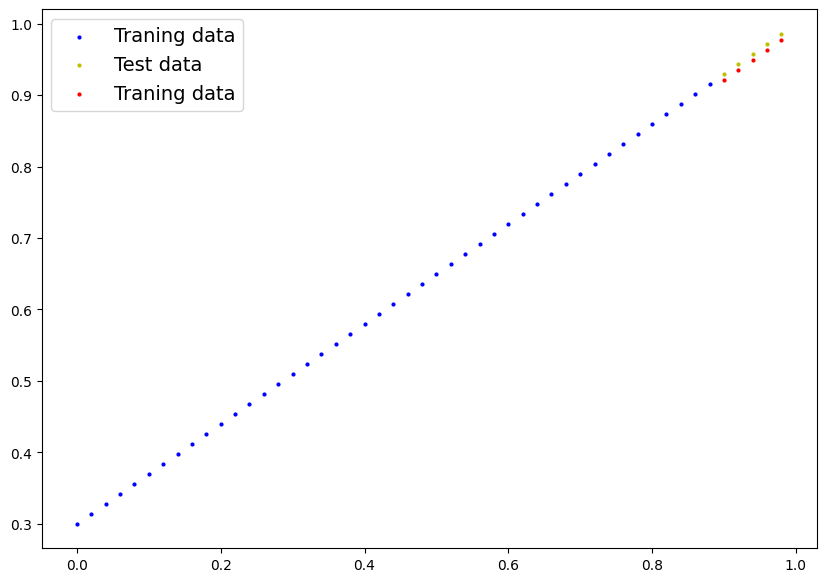

In [35]:
plot_data(prediction=y_pred.cpu())